| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | [Appendix - Tools, R functions](#appendix) |

**Authors:** Andrej Gajdoš, Martina Hančová, Jozef Hanč <br> *[Faculty of Science](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN), P. J. Šafárik University in Košice, Slovakia* <br> emails: [andrej.gajdos@student.upjs.sk](mailto:andrej.gajdos@student.upjs.sk), [martina.hancova@upjs.sk](mailto:martina.hancova@upjs.sk)
***
**<font size=6 color=brown> FDSLRM applications - Cyber attacks </font>**  

<font size=5> Weekly cyber attacks against honeynet </font> 

<a id=table_of_contents></a>
###  Table of Contents 
* [Data and model](#data_and_model) - data and model description, estimating parameters, software
* [Modeling](#modeling) - loading R functions and packages, data plot, periodogram
* [Residual diagnostics](#residual_diagnostics) - description of graphical tools, numerical tests
* [Fitting summary](#fitting_summary) - estimated model parameters, fit summary
* [Session info](#session_info) - list of applied R packages in computations
* [References](#references) - list of detailed references for data and applied methods
* [Appendix - Tools, R functions](#appendix) - brief help on applied diagnostic tools, R functions

**To get back to the contents, use <font color=brown>the Home key</font>.**

***
<a id=data_and_model></a>
# <font color=brown>Data and model </font>


### Data description

In this FDSLRM application we model the time series data set representing total weekly number of cyber attacks against honeynet. Data were collected from November 2014 to May 2016 in CZ.NIC honeynet consisting of Kippo honeypots in medium-interaction mode. The number of time series observations is $n=72$, the correspoding plot with more details is shown in the following section **_Modeling_**. The data was adapted from *Sokol, 2018*.


### Model description

The cyber attacks data can be succesfully fitted by the FDSLRM of the form:

$$ X(t)=\beta_1+\beta_2\cos\left(\tfrac{2\pi t\cdot 3}{72}\right)+\beta_3\sin\left(\tfrac{2\pi t\cdot 3}{72}\right)+\beta_4\sin\left(\tfrac{2\pi t\cdot 4}{72}\right)
+Y_1\sin\left(\tfrac{2\pi\ t\cdot 6}{72}\right)+Y_2\sin\left(\tfrac{2\pi\cdot t\cdot 7}{72}\right)+w(t), \, t\in \mathbb{N},$$ 

where
- $\boldsymbol{\beta}=(\beta_1,\,\beta_2,\,\beta_3,\,\beta_4)' \in \mathbb{R}^4\,$ is a vector of real regression coefficients, 
- $\mathbf{Y} = (Y_1,Y_2)' \sim \mathcal{N}_2(\boldsymbol{0}, \mathrm{D})\,$ is an unobservable Gaussian random vector with zero mean vector and covariance matrix 
$\mathrm{D} = \,\scriptstyle 
\begin{pmatrix} 
\sigma_1^2 & 0\\ 
0 & \sigma_2^2
\end{pmatrix}$, 
- $w(t) \sim \mathcal{iid}\, \mathcal{N} (0, \sigma_0^2)\,$ is Gaussian iid noise with variance $\sigma_0^2$,
- $\boldsymbol{\nu}= (\sigma_0^2, \sigma_1^2, \sigma_2^2) \in \mathbb{R}_{+}^3 \,$ is a vector of real nonnegative variance-covariance parameters.

We identified the given and most parsimonious structure of the FDSLRM using an iterative process of the model building and selection based on exploratory tools of *spectral analysis* (*Gajdoš et al., 2017*; *Brockwell & Davis, 2006*) and *residual diagnostics* (see sections **_Modelling_** and **_Residual diagnostics_**).

### Estimating the model parameters

During the modelling, we obtained: 
- estimates $\boldsymbol{\nu^*}=(0.059, 0.024, 0.0139)'$ of variance-covariance components $\boldsymbol{\nu} $ by *residual maximum likelihood (REML)*, 
- estimates  $\boldsymbol{\beta^*}=(7.683, -0.145, 0.201, -0.130)'$ of regression parameters in trend $\boldsymbol{\beta} $ by *weighted least squares*, 
- predictions $\mathbf{Y^*}=(0.149, -0.111)'$ of the random vector $\mathbf{Y}$ using *the best linear unbiased predictor (BLUP)* procedure. 

The methods and procedures described for FDSLRM in more detail can be found in *Štulajter 2002, 2003; Gajdoš et al. 2018*. Estimated values of $\boldsymbol{\beta}, \boldsymbol{\nu}$ and predictions of $\mathbf{Y}$ are also presented in the form of tables in **_Fitting summary_**. 

### Computational software
As for numerical calculations, we conducted our computations in _the R statistical computing language_ (https://www.r-project.org; *R Development Core Team, 2018*) with the key libraries _nlme_ (*Pinhero et al., 2018;  Galecki & Burzykowski, 2013*), R functions for LMM programmed by Singer (*Singer et al., 2017*) and  R functions for FDSLRM programmed by authors of the Jupyter notebook included in _fdslrm_ package. The complete list of used R libraries is included in **_Session info_**.

| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | [Appendix - Tools, R functions](#appendix) |

***
<a id=modeling></a>
# <font color=brown>Modeling </font>

> **Remark.** <br>
*Mean value (or FDSLRM trend) component* $m(t)$ of our FDSLRM  is the real function in the form of: <br>
- *the linear regression (LR)* $-$ the linear combination of deterministic real functions $ f_1(t)=1,\,f_2(t)=\cos\left(\tfrac{2\pi t\cdot 3}{72}\right),\,f_3(t)=\sin\left(\tfrac{2\pi t\cdot 3}{72}\right),\,f_3(t)=\sin\left(\tfrac{2\pi t\cdot 4}{72}\right)$ with real amplitudes $\beta_1, \beta_2, \beta_3, \beta_4$
$$ m(t) = \sum\limits_{i=1}^{4}f_i(t)\beta_i,  \, t \in \mathbb{N}. $$
>
>*Random errors (or FDSLRM errors) component* $\varepsilon(t)$ of our FDSLRM is the zero mean value time series consisting of: <br> 
- *finite discrete spectrum errors (FDS errors)*  $-$ the linear combination of deterministic real functions $v_1(t)=\sin\left(\tfrac{2\pi t\cdot 6}{72}\right),\,v_2(t)=\sin\left(\tfrac{2\pi t\cdot 7}{72}\right)$ with mutually uncorrelated random amplitudes  $Y_1,Y_2$ and
- *white noise errors (WN errors)* $-$ $\mathcal{wn}$ (or $\mathcal{iid}$) noise $w(t)$
$$ \varepsilon(t) = \sum\limits_{j=1}^{2}v_j(t)Y_j + w(t),  \, t \in \mathbb{N}. $$

### Loading R functions and packages
A brief help on all applied R functions and packages designed to work with FDSLRM is in the section **_Appendix_**.

*<font size=2>Important note:</font>* 
<font size=2> After our testing, the most reliable way to install our fdslrm package in a Binder repository is its direct loading from GitHub. The standard installation of our fdslrm package as in the case of any R package on GitHub works without any problems in a local installation using Anaconda R distribution or CRAN distribution.</font>

In [1]:
# loading all fdslrm functions as an R script from GiHub
devtools::source_url("https://github.com/fdslrm/fdslrmAllinOne/blob/master/fdslrmAllinOne.R?raw=TRUE")
initialFDSLRM()

SHA-1 hash of file is f56b9d53e72a8575947a467930a2bdddb5b500ad


### Data plot
The cyber attacks data set was adapted from *Sokol, 2018*. The more detailed data description can be found in *Sokol, 2018*. 

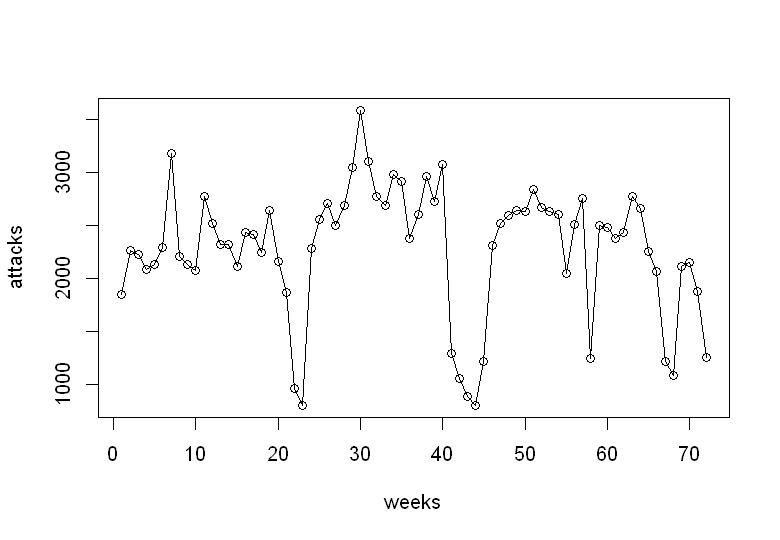

In [2]:
# Loadig data
dt <- read.csv2("Cyberattacks.csv", header = FALSE, sep = ",")
dt <- as.numeric(as.vector(dt[-1,]))
t <- 1:length(dt)

# IPython setting for output
options(repr.plot.res=120, repr.plot.height=4.5, repr.plot.width=6.5)

# Plotting data 
plot(t, dt, type = "o", xlab = "weeks", ylab = "attacks")

Due to big variability in the data we consider the logarithmic transformation of data. 

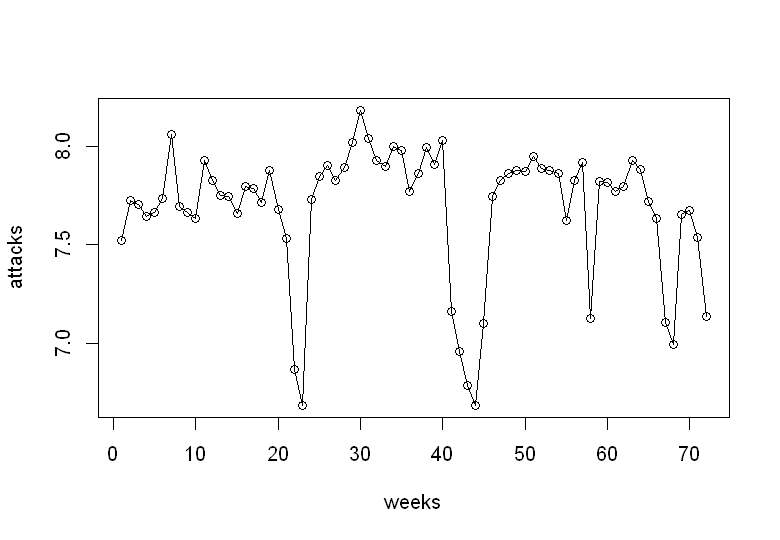

In [3]:
dt_log <- log(dt)
plot(t, dt_log, type = "o", xlab = "weeks", ylab = "attacks")

### Spectral analysis - Periodogram 
Each stationary time series can be decomposed into sines and cosines with different frequencies and random amplitudes. To identify significant (Fourier) frequencies, we apply a spectral time series exploratory tool called *periodogram* (more details in *Gajdoš et al., 2017*).

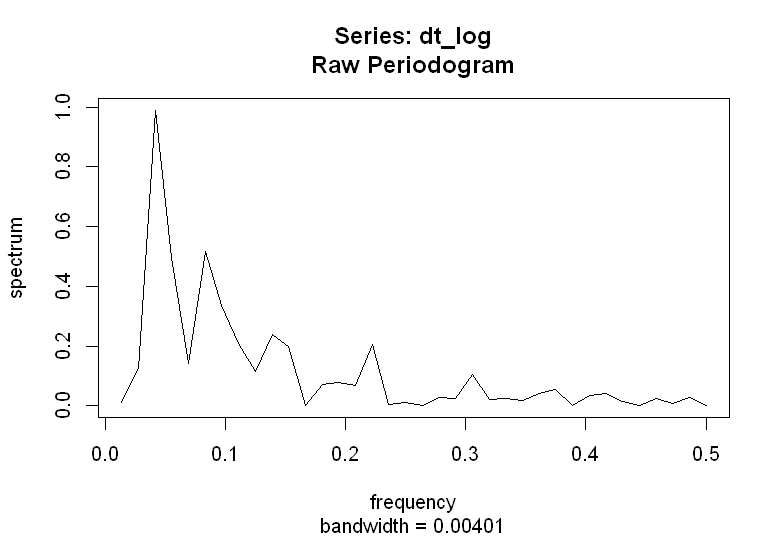

In [4]:
# periodogram
periodo <- spec.pgram(dt_log, log="no")

#### Six most significant frequencies according to values of spectrum in periodogram.

In [5]:
drawTable(type = "periodogram", periodogram = periodo)

spectrum,0.9899895,0.5162030,0.4981809,0.3356683,0.2388390,0.2073755
frequency (raw),0.0416667,0.0833333,0.0555556,0.0972222,0.1388889,0.1111111


> The raw frequencies from periodogram can be easily rewritten to the corresponding Fourier frequencies in the standard form $2\pi k/n$, where $k$ is the frequency order and $n$ is the number of time series observations (or a very close integer number); e.g. the first raw frequency $0.0416667$ can be expressed as $0.0416667=3/72$, which corresponds to the Fourier frequency $2\pi \cdot 3/72 = \pi/12$ or the last (sixth) significant frequency: $0.1111111\cdot72=8 \Rightarrow 2\pi\cdot 8/72=2\pi/9$.

In [6]:
# orders k for Fourier frequencies
print(round(72*c(0.0416667,0.0833333, 0.0555556, 0.0972222, 0.1388889, 0.1111111)))

[1]  3  6  4  7 10  8


In [7]:
fnames= c("3/72", "6/72", "4/72", "7/72", "10/72", "8/72")
drawTable(type = "periodogram", periodogram = periodo, frequencies = fnames)

spectrum,0.9899895,0.5162030,0.4981809,0.3356683,0.2388390,0.2073755
frequency (raw),0.04166667,0.08333333,0.05555556,0.09722222,0.13888889,0.11111111
frequency,$3/72$,$6/72$,$4/72$,$7/72$,$10/72$,$8/72$


| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | [Appendix - Tools, R functions](#appendix) |

***
<a id=residual_diagnostics></a>
# <font color=brown> Residual diagnostics </font>

Our FDSLRM for the tourism data can be rewritten in the matrix form as a linear mixed model (LMM): 

$$\mathbf{X}=\mathrm{F}\boldsymbol{\beta}+\mathrm{V}\mathbf{Y}+\boldsymbol{w},$$
where 

- $\mathbf{X} = (X(1), X(2), \ldots, X(72))'$ is a vector of the time series observations,
- $\boldsymbol{w} = (w(1),w(2), \ldots, w(72))'$ is a random vector of corresponding iid (or white) noise values
- model design matrices $\mathrm{F}, \mathrm{V}$ for our final model have the following structure: 
$$\mathrm{F} \,{\scriptsize = \,
 \begin{pmatrix}
  1      & \cos\left(\tfrac{2\pi\cdot 3}{72}\right)   & \sin\left(\tfrac{2\pi\cdot 3}{72}\right) & \sin\left(\tfrac{2\pi\cdot 4}{72}\right) \\
  1      & \cos\left(\tfrac{2\pi\cdot 6}{72}\right)  & \sin\left(\tfrac{2\pi\cdot 6}{72}\right) & \sin\left(\tfrac{2\pi\cdot 8}{72}\right) \\
  \vdots & \vdots                             & \vdots & \vdots \\
  1      & \cos\left(\tfrac{2\pi\cdot 216}{72}\right) & \sin\left(\tfrac{2\pi\cdot 216}{72}\right) & \sin\left(\tfrac{2\pi\cdot 288}{72}\right) 
 \end{pmatrix}\qquad} 
\mathrm{V} \scriptsize = 
 \begin{pmatrix}
 \sin\left(\tfrac{2\pi\cdot 6}{72}\right)   & \sin\left(\tfrac{2\pi\cdot 7}{72}\right) \\
 \sin\left(\tfrac{2\pi\cdot 12}{72}\right)  & \sin\left(\tfrac{2\pi\cdot 14}{72}\right) \\
 \vdots                              & \vdots \\
 \sin\left(\tfrac{2\pi\cdot 432}{72}\right) & \sin\left(\tfrac{2\pi\cdot 504}{72}\right)
 \end{pmatrix}.$$

This fundamental FDSLRM property allows us to apply many results and mathematical techniques of
LMM methodology. In the language of LMM terminology $\boldsymbol{\beta}$ represents the vector of fixed effects, the random component depends on vector $\mathbf{Y}$ of random effects and $\boldsymbol{w}$ of random errors.
From the viewpoint of LMM residual analysis, we have to consider three types of residuals: 
 
 * _marginal residuals_ (FDSLRM residuals): $\mathbf{X}-\mathrm{F}{\boldsymbol{\beta^*}}$,
 * _random effects residuals_ (FDS residuals): $\mathrm{V}{\mathbf{Y^*}}$, 
 * _conditional residuals_ (WN residuals): $\mathbf{X}-\mathrm{F}{\boldsymbol{\beta^*}}-\mathrm{V}{\mathbf{Y^*}}$. 
  
*<font size=3>How was the final form of $\mathrm{F}$ and $\mathrm{V}$ found?</font>*

Due to the LMM structure,  we can apply graphical (exploratory) tools and quantitative tests of LMM residual diagnostics (*Singer et al., 2017*) for FDSLRM observations (see the next subsection **_Graphical tools_**). The most suitable form of $\mathrm{F}$ and $\mathrm{V}$ is found by an iterative process (see rules and steps explained in the next remark) of applying the mentioned tools whose results are summarized in the following table. Two most adequate and parsimonious structures of the FDSLRM (2b, 3b) consist of two low frequencies $(2\pi\cdot 3/72, 2\pi\cdot 4/72)$ and two higher ones $(2\pi\cdot 6/72, 2\pi\cdot 7/72)$. Since the difference in AIC, BIC for both models is relatively small, our final choice is *_model 3b_* thanks to the generally smaller mean squared error in predictions (*Hančová, 2007*). 

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-c3ow">Iteration<br>number</th>
    <th class="tg-c3ow" colspan="9">Graphical diagnostic tools</th>
    <th class="tg-c3ow" colspan="2">Numerical diagnostic tests</th>
    <th class="tg-c3ow" colspan="4">Frequencies (raw) in model</th>
  </tr>
  <tr>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">L</td>
    <td class="tg-c3ow">O1</td>
    <td class="tg-c3ow">H</td>
    <td class="tg-c3ow">O2</td>
    <td class="tg-c3ow">ACF</td>
    <td class="tg-c3ow">PACF</td>
    <td class="tg-c3ow">N1</td>
    <td class="tg-c3ow">N2</td>
    <td class="tg-c3ow">N3</td>
    <td class="tg-c3ow">Normality<br>test</td>
    <td class="tg-c3ow">Independence<br>test</td>
    <td class="tg-c3ow">$\dfrac{3}{72}$</td>
    <td class="tg-c3ow">$\dfrac{4}{72}$</td>
    <td class="tg-c3ow">$\dfrac{6}{72}$</td>
    <td class="tg-c3ow">$\dfrac{7}{72}$</td>
  </tr>
  <tr>
    <td class="tg-c3ow">1.</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">?</td>
    <td class="tg-c3ow">?</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\times$</td>
    <td class="tg-c3ow">T,1,1</td>
    <td class="tg-c3ow">T,1,1</td>
    <td class="tg-c3ow">R,1,1</td>
    <td class="tg-c3ow">-</td>
  </tr>
  <tr>
    <td class="tg-c3ow">2a.</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">?</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">T,1,1</td>
    <td class="tg-c3ow">T,1,1</td>
    <td class="tg-c3ow">R,1,1</td>
    <td class="tg-c3ow">R,1,1</td>
  </tr>
  <tr>
    <td class="tg-c3ow">2b.</td>
    <td class="tg-c3ow">$?$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">T,1,1</td>
    <td class="tg-c3ow">T,0,1</td>
    <td class="tg-c3ow">R,0,1</td>
    <td class="tg-c3ow">R,0,1</td>
  </tr>
  <tr>
    <td class="tg-c3ow">3a.</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">?</td>
    <td class="tg-c3ow">?</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">T,1,1</td>
    <td class="tg-c3ow">T,1,1</td>
    <td class="tg-c3ow">T,1,1</td>
    <td class="tg-c3ow">R,1,1</td>
  </tr>
  <tr>
    <td class="tg-c3ow">3b.</td>
    <td class="tg-c3ow">$?$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">$\checkmark$</td>
    <td class="tg-c3ow">T,1,1</td>
    <td class="tg-c3ow">T,0,1</td>
    <td class="tg-c3ow">T,0,1</td>
    <td class="tg-c3ow">R,0,1</td>
  </tr>
</table>

*<font size=1>Coding: letter (T or R) $-$ presence of the frequency in the trend or random component; the first number (1 or 0) $-$ presence  of the frequency in the cos term; the second number (1 or 0) $-$ in the sin term </font>

> **Key rules and steps of the iterative econometric FDSLRM-building**  
>General rules of the FDSLRM-building for econometric data (*Štulajter, 2002*; *Box et al., 2016*; *Gajdoš et al, 2017*): 
- the model should be parsimonious (in the form of a simple dependence with a small number of the parameters),
- the model should create small unexplained (random) deviations (small variances, covariances or mean squared errors),
- the model should include lower frequencies in the trend component, and higher ones in the random component.
>
>Key steps of the FDSLRM-building for econometric data (our experience): 
- follow the scheme of the Box-Jenkins iterative, three-stage time series model-building approach: formulation (identification), estimation (fit), diagnostic (checking),
- the more apparent periodic or seasonal patterns in the data mean the smaller number of iterations in the model building,
- start at least with the three most significant frequencies in the model, 
- use the graphical-tools diagnostic matrix and numerical tests (see below) to check the adequacy of the model,
- remove or add other significant frequencies and check the model adequacy,
- remove cos or sin term with a particular frequency and check the model adequacy,
- very small or very big variance parameter estimates indicate a reason to remove the corresponding cos or sin term with a particular frequency in the random component,
- very small predictions of random effects also indicate an exclusion of the corresponding term in the random component,
- use information criteria AIC, BIC to choose between competing adequate models. 

### Graphical (exploratory) tools 

>In the LMM residual analysis for FDSLRM we can use the following matrix of graphical exploratory tools (plots) as diagnostic tools for all FDSLRM assumptions. A brief description of the tools is in the **_Appendix_**.
>
>|$ $|$\large\mbox{Graphical-tools diagnostic matrix}$|$ $|
|---|------------------------------------------------|---| 
|   |   
|$\mbox{linearity of fixed effects (L)}$| $\mbox{outlying observations (O1)}\hspace{0.75cm}$ | $\mbox{independence of cond. errors (ACF)} $ |
|**stand. marg. residuals vs marg. fitted values**|**stand. marg. residuals vs times**$\hspace{0.75cm}$|**ACF of cond. residuals**|
|   |  
|$\mbox{homoscedascity of cond. errors (H)}$|$\mbox{outlying observations (O2)}\hspace{0.75cm}$|$\mbox{independence of cond. errors (PACF)} $ |
|**stand. cond. residuals vs cond. predictions**|**stand. cond. residuals vs times**$\hspace{0.75cm}$|**PACF of cond. residuals**|
|   | 
|$\mbox{normality of cond. errors (N1)}$|$\mbox{normality of cond. errors (N2)}\hspace{0.75cm}$|$\mbox{normality of cond. errors (N3)} $ |
|**histogram of cond. residuals**|**histogram of stand. least conf. residuals**$\hspace{0.75cm}$|**stand. least conf. residuals vs $\mathcal{N}(0,1)$ quantiles**|

We present the residual diagnostics results for the final model (2b).

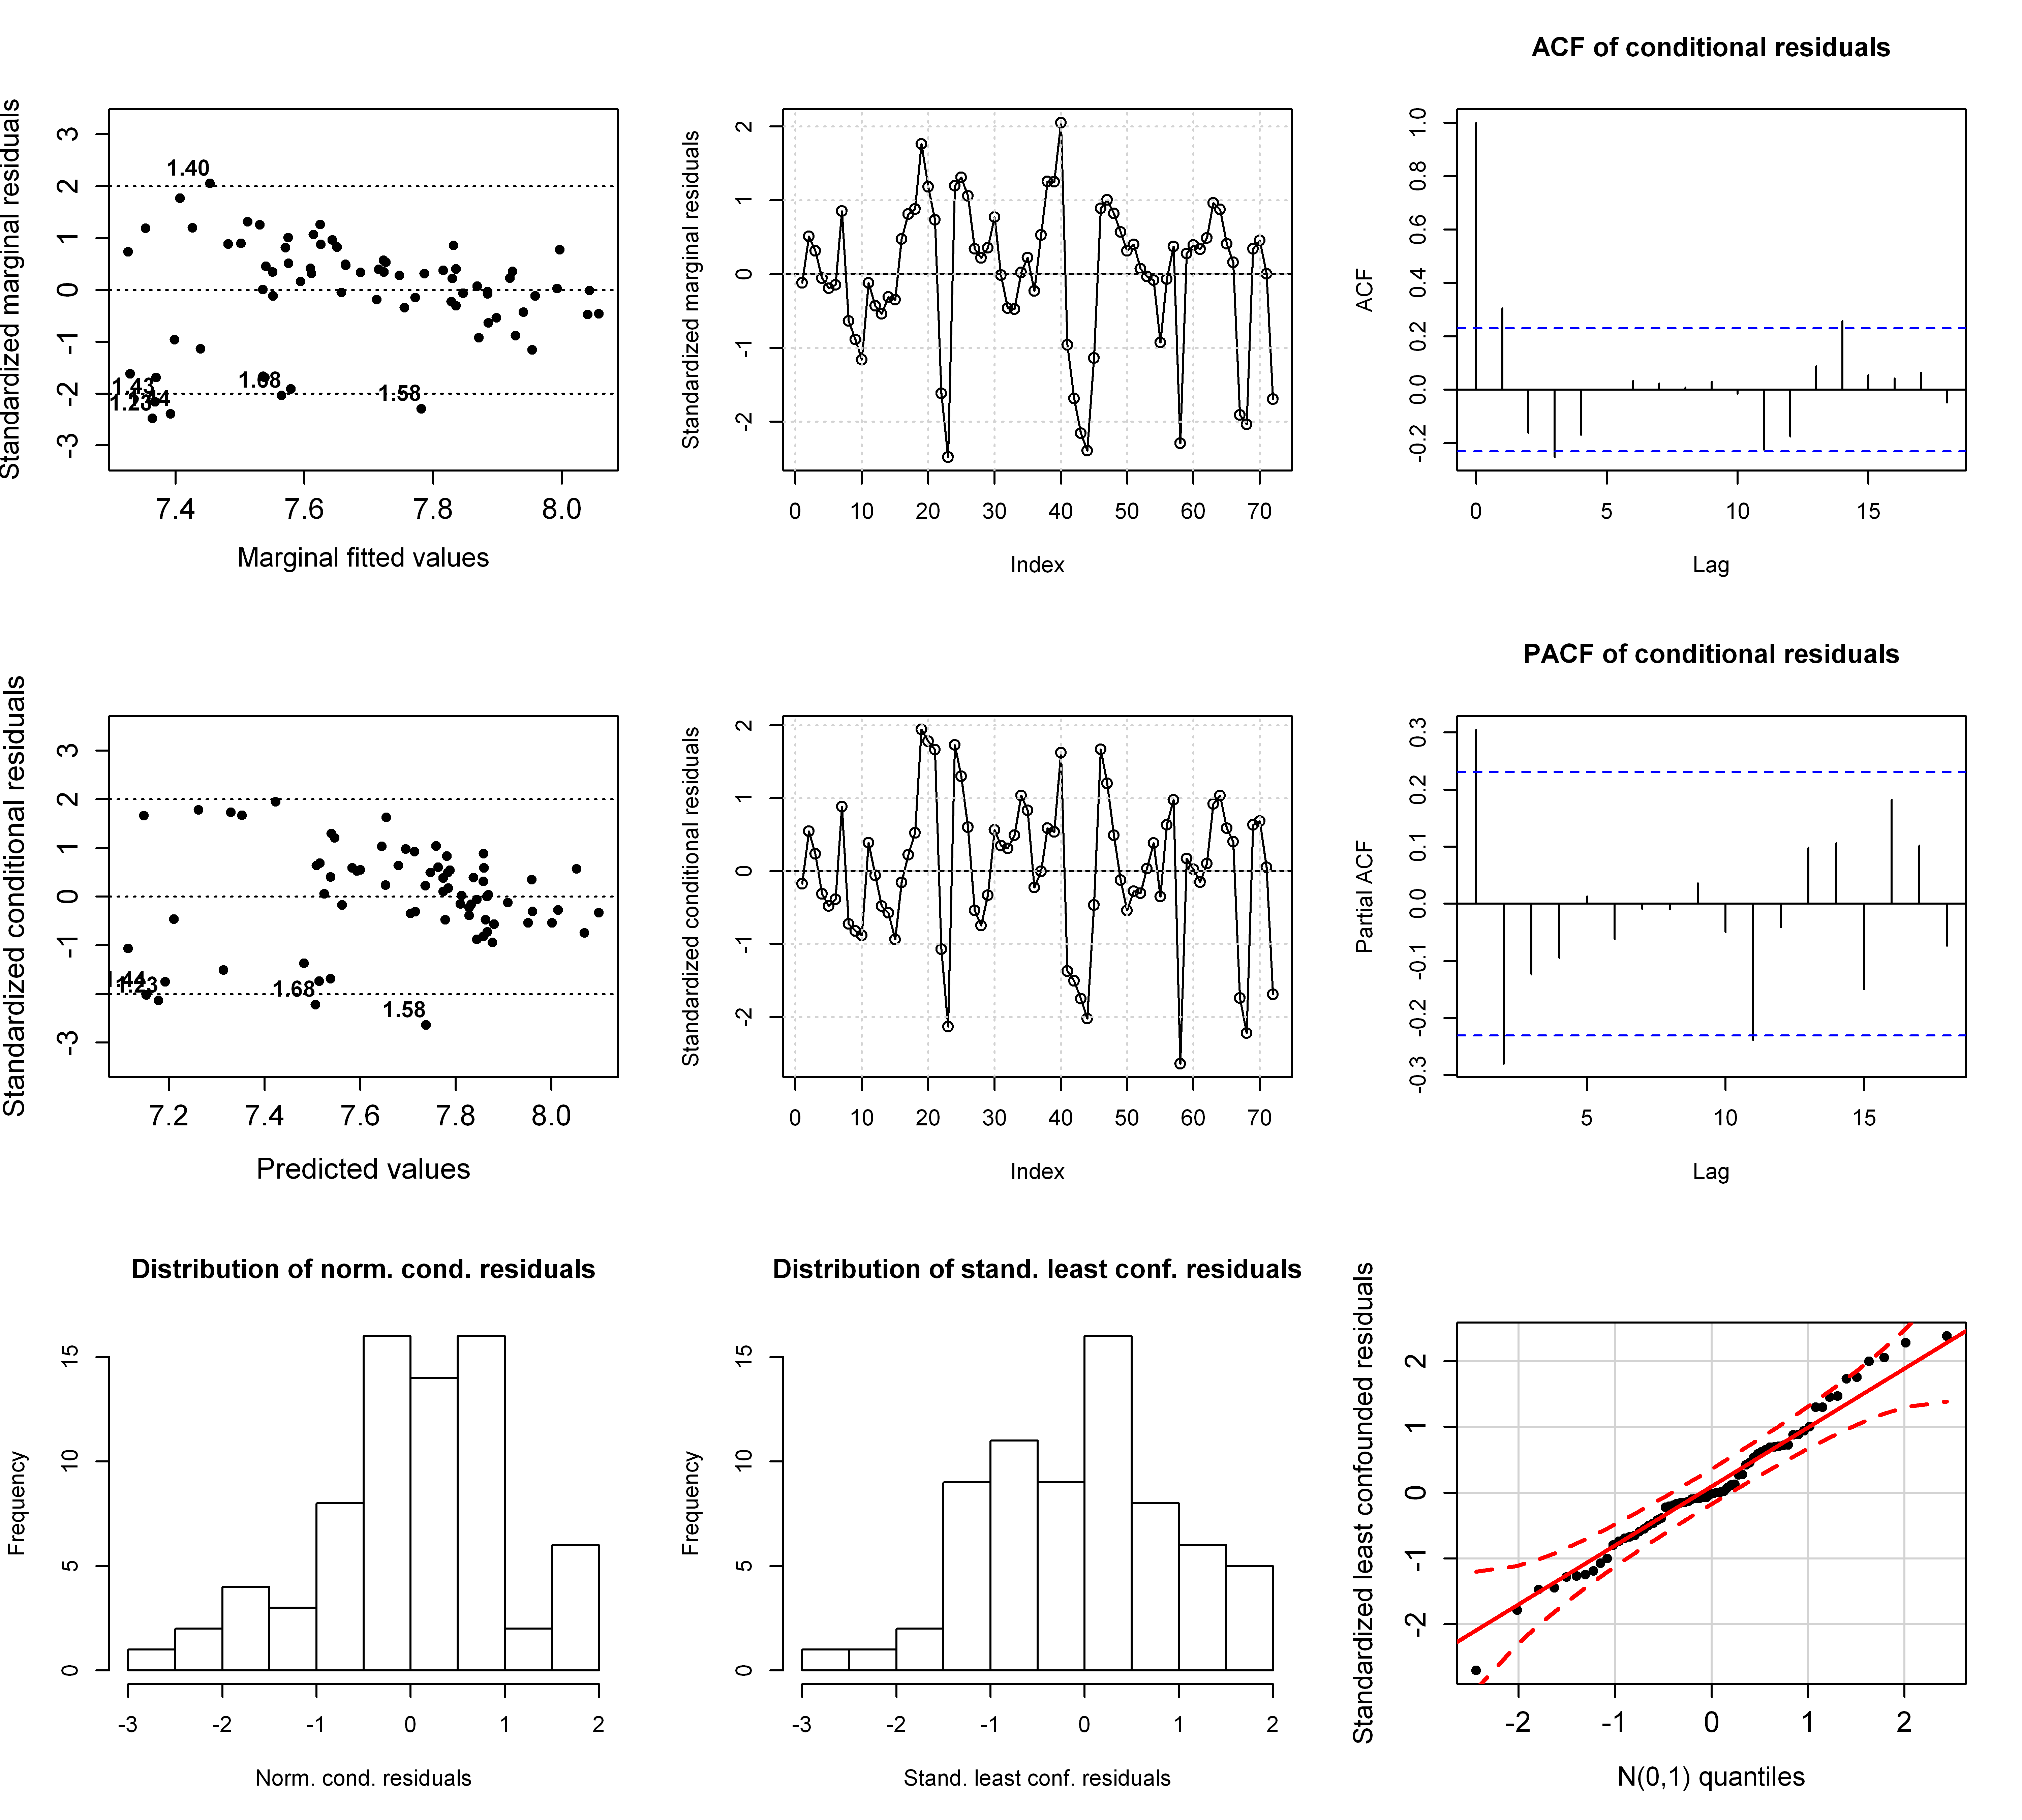

In [8]:
# Fitting the final FDSLRM
output <- fitDiagFDSLRM(dt_log, t, c(3/72,4/72), include_fixed_eff = c(1,1,0,1),
                          freq_random = c(6/72,7/72), include_random_eff = c(0,1,0,1))

options(repr.plot.res=600, repr.plot.height=9, repr.plot.width=10)
drawDiagPlots("all", output)

### Single panels for diagnostic
Our function `drawDiagPlots()` also allows to show any of diagnostic plots above in a single panel. Here we show two additional plots (not included in the Graphical-tools diagnostic matrix).

* plot: **cumulative periodogram of conditional residuals** - detection of periodic nonrandomness in conditional residuals
* plot: **standardized marginal residuals vs marginal fitted values** - test of linearity of fixed effects 

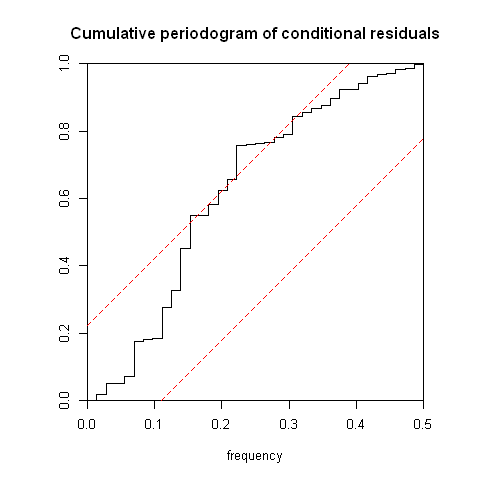

In [9]:
options(repr.plot.res=80, repr.plot.height=6, repr.plot.width=6)
drawDiagPlots(output$diagnostic_plots_names$CumulatPeriodogCondResid, output)

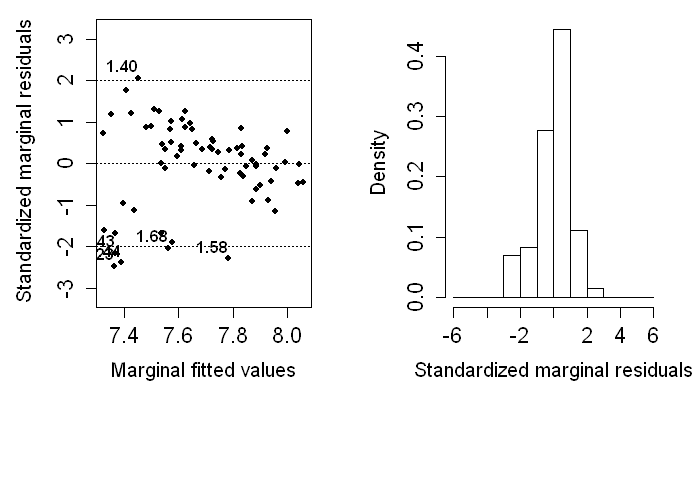

In [10]:
options(repr.plot.res=100, repr.plot.height=5, repr.plot.width=7)
drawDiagPlots(output$diagnostic_plots_names$StdMarginalResidVsFittedValues, output)

### Numerical tests

#### Tests of residual independence

In [11]:
# output$Box_test
# output$BoxLjung_test
print(output$Box_test_lag10_resid)
print(output$BoxLjung_test_lag10_resid)


	Box-Pierce test

data:  resid(fit)
X-squared = 15.425, df = 10, p-value = 0.1173


	Box-Ljung test

data:  resid(fit)
X-squared = 16.36, df = 10, p-value = 0.08977



#### Test of residual normality

In [12]:
print(output$ShapiroWilk_test_norm_cond_resid)
print(output$ShapiroWilk_test_stand_least_conf_resid)


	Shapiro-Wilk normality test

data:  resid(fit, type = "normalized")
W = 0.97489, p-value = 0.1592


	Shapiro-Wilk normality test

data:  SingerEtAl_resid_diag$least.confounded.residuals
W = 0.98624, p-value = 0.6597



| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | [Appendix - Tools, R functions](#appendix) |

***
<a id=fitting_summary></a>
# <font color=brown> Fitting summary </font>

### Parameter estimates

#### Estimates of regression coefficients

In [13]:
drawTable(type = "fixed", fixed_eff = output$fixed_effects)

,$\beta_{1}$,$\beta_{2}$,$\beta_{3}$,$\beta_{4}$
,7.683338,-0.1448348,0.2014634,-0.1296788


#### Predictions of random effects

In [14]:
drawTable(type = "random", random_eff = output$random_effects)

,$Y_{1}$,$Y_{2}$
,0.1492801,-0.1112381


#### Estimates of variance parameters

In [15]:
drawTable(type = "variance", variances = c(output$error_variance, diag(output$rand_eff_variance)))

$\sigma_{0}^2$,$\sigma_{1}^2$,$\sigma_{2}^2$
0.059342,0.0238263,0.0138469


### Fit summary

#### Graphical  summary for the final model (3b)
* plot: **time series observations (black), fitted values (blue), estimated trend (red) vs times**

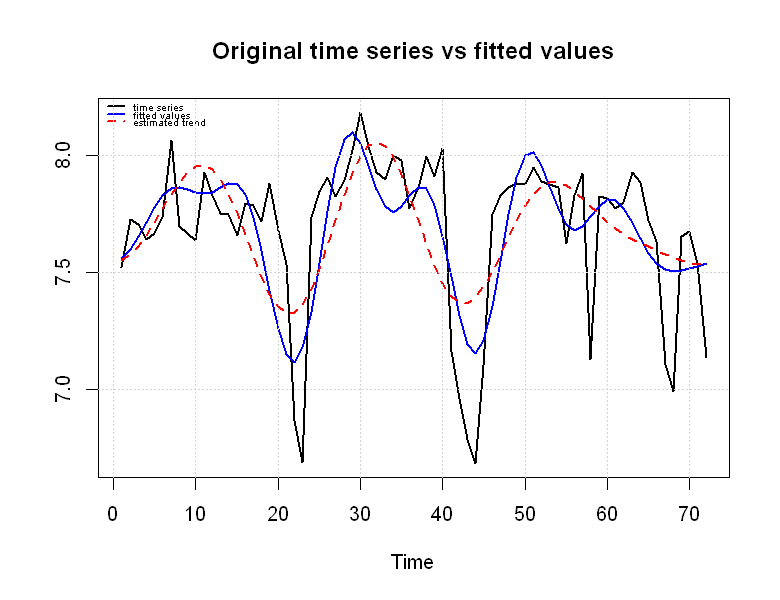

In [16]:
options(repr.plot.res=120, repr.plot.height=5, repr.plot.width=6.5)
drawDiagPlots(output$diagnostic_plots_names$FittedTimeSeries, output)

#### Numerical summary for the final model (2b)

In [17]:
print(output$fit_summary)

Linear mixed-effects model fit by REML
 Data: d 
       AIC      BIC    logLik
  34.91972 50.45628 -10.45986

Random effects:
 Formula: ~-1 + v1 + v2 | g
 Structure: Diagonal
               v1       v2  Residual
StdDev: 0.1543577 0.117673 0.2436022

Fixed effects: as.formula(paste("x~", paste(names(d)[2:kk], collapse = "+"))) 
                Value  Std.Error DF   t-value p-value
(Intercept)  7.683337 0.02870879 68 267.63014  0.0000
f2          -0.144835 0.04060036 68  -3.56733  0.0007
f3           0.201463 0.04060036 68   4.96211  0.0000
f4          -0.129679 0.04060036 68  -3.19403  0.0021
 Correlation: 
   (Intr) f2 f3
f2 0           
f3 0      0    
f4 0      0  0 

Standardized Within-Group Residuals:
       Min         Q1        Med         Q3        Max 
-2.5042072 -0.4728622  0.0421905  0.5706248  1.8761966 

Number of Observations: 72
Number of Groups: 1 


#### Numerical summary for model 3b

In [18]:
# AIC, BIC, loglike for model 3b
output2b <- fitDiagFDSLRM(dt_log, t, c(3/72,4/72,6/72), include_fixed_eff = c(1,1,0,1,0,1),  
                          freq_random = c(7/72), include_random_eff = c(0,1))

print(output2b$fit_summary)

Linear mixed-effects model fit by REML
 Data: d 
       AIC      BIC    logLik
  35.75192 51.18476 -10.87596

Random effects:
 Formula: ~-1 + v1 | g
              v1  Residual
StdDev: 0.117673 0.2436022

Fixed effects: as.formula(paste("x~", paste(names(d)[2:kk], collapse = "+"))) 
                Value  Std.Error DF   t-value p-value
(Intercept)  7.683337 0.02870879 67 267.63014  0.0000
f2          -0.144835 0.04060036 67  -3.56733  0.0007
f3           0.201463 0.04060036 67   4.96211  0.0000
f4          -0.129679 0.04060036 67  -3.19403  0.0021
f5           0.159608 0.04060036 67   3.93119  0.0002
 Correlation: 
   (Intr) f2 f3 f4
f2 0              
f3 0      0       
f4 0      0  0    
f5 0      0  0  0 

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-2.46749126 -0.49793962  0.04298845  0.54554736  1.89739460 

Number of Observations: 72
Number of Groups: 1 


| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | [Appendix - Tools, R functions](#appendix) |

***
<a id=session_info></a>
# <font color=brown> Session info </font>

In [19]:
print(sessionInfo())

R version 3.5.1 (2018-07-02)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 17763)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] pracma_2.2.5     gnm_1.1-0        sommer_3.9.3     crayon_1.3.4    
 [5] lattice_0.20-38  matrixcalc_1.0-3 fpp2_2.3         expsmooth_2.3   
 [9] fma_2.3          ggplot2_3.1.1    forecast_8.7     nlme_3.1-139    
[13] car_3.0-2        carData_3.0-2    Matrix_1.2-17    MASS_7.3-51.4   
[17] IRdisplay_0.7.0  kableExtra_1.1.0

loaded via a namespace (and not attached):
 [1] fs_1.3.1          xts_0.11-2        usethis_1.5.0     devtools_2.0.2   
 [5] webshot_0.5.1     httr_1.4.0        rprojroot_1.3-2  

| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | [Appendix - Tools, R functions](#appendix) |

***
<a id=references></a>
# <font color=brown> References </font>
This notebook belongs to suplementary materials of the paper submitted to Statistical Papers and available at <https://arxiv.org/abs/1905.07771>.

* Hančová, M., Vozáriková, G., Gajdoš, A., Hanč, J. (2019). [Estimating variance components in time series
	linear regression models using empirical BLUPs and convex optimization](https://arxiv.org/abs/1905.07771), https://arxiv.org/, 2019.  

### Abstract of the paper

We propose a two-stage estimation method of variance components in time series models known as FDSLRMs, whose observations can be described by a linear mixed model (LMM). We based estimating variances, fundamental quantities in a time series forecasting approach called kriging, on the empirical (plug-in) best linear unbiased predictions of unobservable random components in FDSLRM. 

The method, providing invariant non-negative quadratic estimators, can be used for any absolutely continuous probability distribution of time series data. As a result of applying the convex optimization and the LMM methodology, we resolved two problems $-$ theoretical existence and equivalence between least squares estimators, non-negative (M)DOOLSE, and maximum likelihood estimators, (RE)MLE, as possible starting points of our method and a 
practical lack of computational implementation for FDSLRM. As for computing (RE)MLE in the case of $ n $ observed time series values, we also discovered a new algorithm of order $\mathcal{O}(n)$, which at the default precision is $10^7$ times more accurate and $n^2$ times faster than the best current Python(or R)-based computational packages, namely CVXPY, CVXR, nlme, sommer and mixed. 

We illustrate our results on three real data sets $-$ electricity consumption, tourism and cyber security $-$ which are easily available, reproducible, sharable and modifiable in the form of interactive Jupyter notebooks.
$~$
* Brockwell, P. J., Davis, R. A. (2016). [Introduction to Time Series and Forecasting (3rd ed.)](https://www.springer.com/la/book/9783319298528). New York, NY: Springer


* Brockwell, P. J., & Davis, R. A. (2006). [Time Series: Theory and Methods (2nd ed.)](https://www.springer.com/la/book/9780387974293#aboutBook). New York: Springer-Verlag


* Box, G. E. P., Jenkins, G. M., Reinsel, G. C., Ljung, G. M. (2015). [Time Series Analysis: Forecasting and Control (5th ed.)](https://www.wiley.com/en-us/Time+Series+Analysis%3A+Forecasting+and+Control%2C+5th+Edition-p-9781118675021). Hoboken, New Jersey: Wiley


* Gajdoš, A., Hančová, M., Hanč, J. (2017). [Kriging Methodology and Its Development in Forecasting Econometric Time Series](https://www.czso.cz/csu/czso/statistika-statistics-and-economy-journal-no-12017). _Statistica: Statistics and Economy Journal_, 2017, Vol. 97, No. 1, pp. 59–73


* Galecki, A, Burzykowski, T. (2013). [Linear Mixed-Effects Models Using R: A Step-by-Step Approach](https://www.springer.com/la/book/9781461438991). New York: Springer


* Hančová, M. (2007). [Comparison of prediction quality of the best linear unbiased predictors in time series linear regression models](http://matematicas.unex.es/~idelpuerto/WEB_EYSM/Articles/sk_martina_hancova_art.pdf). Proceedings of 15th European Young Statisticians Meeting. Castro Urdiales (Spain): University of Extremadura, http://matematicas.unex.es/~idelpuerto/15thEYSM.html. 


* Hilden-Minton, J.A. (1995). [Multilevel diagnostics for mixed and hierarchical linear models](https://cgspace.cgiar.org/handle/10568/81585), Unpublished PhD
Thesis, University of California, Los Angeles.


* Nobre, J.S., Singer, J.M. (2007). [Residual analysis for linear mixed models](https://onlinelibrary.wiley.com/doi/abs/10.1002/bimj.200610341). _Biom. J._, Vol. 49, pp. 863–875


* Pinheiro, J., Bates D., DebRoy S., Sarkar, D., R Core Team (2018). _nlme: Linear and Nonlinear Mixed Effects Models_. R package version 3.1-131, URL: [https://CRAN.R-project.org/package=nlme](https://CRAN.R-project.org/package=nlme)


* R Core Team (2018). R: A language and environment for statistical computing. R Foundation for
  Statistical Computing, Vienna, Austria. URL: https://www.R-project.org/


* Singer, J. M., Rocha, F. M. M., Nobre, J. S. (2017). [Graphical Tools for Detecting Departures from Linear Mixed Model Assumptions and Some Remedial Measures](https://onlinelibrary.wiley.com/doi/full/10.1111/insr.12178). _International Statistical Review_, Vol. 85, pp. 290–324; R functions for LMM residual diagnostics https://www.ime.usp.br/~jmsinger/lmmdiagnostics.zip


* Sokol P., Gajdoš, A. (2017). [Prediction of Attacks Against Honeynet Based on Time Series Modeling](https://www.springer.com/gp/book/9783319676203). Silhavy, R., Silhavy, P., & Prokopova, Z. (Eds.). (2017). _Applied Computational Intelligence and Mathematical Methods (Vol. 662)_. Cham: Springer International Publishing. pp. 360-371


* Štulajter, F. (2003). [The MSE of the BLUP in a Finite Discrete Spectrum LRM](https://www.sav.sk/journals/uploads/0131134311STU_2.ps). _Tatra Mountains Mathematical Publications_, 2003, Vol. 26, No. 1, pp. 125–131 


* Štulajter, F. (2002). [Predictions in Time Series Using Regression Models](https://www.springer.com/la/book/9780387953502). New York: Springer 


| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | [Appendix - Tools, R functions](#appendix) |

***
<a id=appendix></a>
# <font color=brown> Appendix - Tools, R functions </font>

A brief help on applied diagnostic tools and R functions.

### Graphical and numerical tools

* **standardized marginal residuals vs marginal fitted values**: residuals not randomly distributed, an obvious pattern of dependency (systematic trend) $\rightarrow$ assumption of linearity of fixed effects violated $\rightarrow$ model rejected.
* **standardized conditional residuals vs predicted values**: residuals not randomly distributed, increase in variance of residuals $\rightarrow$ assumption of homoscedasticity violated $\rightarrow$ model rejected.
* **standardized least confounded residuals vs N(0,1) quantiles**: points do not lie close to the straight line, many points (more than 5%) lie out of confidence bounds $\rightarrow$ assumption of normality of conditionl errors violated $\rightarrow$ model rejected.
* **standardized marginal residuals vs observation indices**: some points are extremely far away from the majority of points $\rightarrow$ outliers detected. 
* **standardized conditional residuals vs observation indices**: some points are extremely far away from the majority of points $\rightarrow$ outliers detected. 
* **autocorrelation function of conditional residuals**: more than 5% of values cross the empirical bounds $\rightarrow$ independence of conditional errors violated $\rightarrow$ reject model. 
* **partial autocorrelation function of conditional residuals**: more than 5% of values cross the empirical bounds $\rightarrow$ independence of conditional errors violated $\rightarrow$ reject model. 
* **histogram of conditional residuals**: histogram does not approximately look like a Gaussian distribution $\rightarrow$ normality of conditional errors violated $\rightarrow$ reject model. 
* **histogram of standardized least confounded residuals**: histogram does not approximately look like a Gaussian distribution $\rightarrow$ normality of conditional errors violated $\rightarrow$ reject model.
> As pointed out in *Nobre and Singer, 2007* according to *Hilden-Minton, 1995* a residual is said to be confounded for a specific type of error if it also depends on errors different from those that it is supposed to predict. In linear mixed
models, conditional residuals and the BLUP are confounded (*Nobre and Singer, 2007*). 
This implies, for example, that estimated conditional residuals be may not be adequate to check for normality of conditional errors since when random effects are grossly non-normal, estimated conditional residuals may not present a normal behavior even when conditional error is normal (*Nobre and Singer, 2007*, Section 4). Following the suggestion of *Hilden-Minton, 1995* we consider **standardized conditional least confounded residuals**, obtained as linear combinations of the standardized conditional residuals that minimize the proportion of their variance due to the random effects.
* **cumulative periodogram of conditional residuals**: cumulative periodogram shows strong systematic deviations from the straight line connecting point $[0,0]$ with point $[0.5,1]$ $\rightarrow$ reject model.

### R functions

#### Packages - fdslrm, stats, repr

> The R package _fdslrm_ has been developed by authors of this notebook and serves the purpose of modelling time series. 

>#### fdslrm: Time series analysis and forecasting using LMM
    
>* _Purpose_: R package for modeling and prediction of time series using linear mixed models.
>* _Version_: 0.1.0, 2019
>* _Depends_: kableExtra, IRdisplay, MASS, Matrix, car, nlme, stats, forecast, fpp2, matrixcalc, sommer, gnm, pracma, CVXR
>* _Maintainer_: Andrej Gajdoš
>* _Authors_: Andrej Gajdoš, Jozef Hanč, Martina Hančová
>* _URL_: https://github.com/fdslrm/R-package
>* _Installation_: Run jupyter notebook `00 installation fdslrm.ipynb` once before the first run of any R-based Jupyter notebook. 

>The `spec.pgram()` function from base R _stats_ package produces periodogram - estimation for spectral density of a time series. 

>The `options(repr.plot.res=.., repr.plot.height=.., repr.plot.width=..)` from _repr_ package set parameters for resizing R plots in Jupyter notebooks.

#### Authors' source code - R functions

> The `initialFDSLRM()` loads essential R packages (`nlme, kableExtra, IRdisplay, MASS, Matrix, car, stats,`...) for time series analysis and visualization (it also installs any missing package - in case of the installation it can take several minutes on the standard computer). Moreover, the function loads authors' R functions designed to work with FDSLRM and some Singer's R functions (*Singer et al. 2017*) for LMM modified by authors of this jupyter notebook . 

> The `fitDiagFDSLRM()` function fits the given FDSLRM and consequently conducts the residual diagnostics. Particularly, it means computing all estimates for the unknown parameters and all the statistical test of residuals. The basic input parameters of this function are 
>* `x` - time series (vector),  
>* `times` - vector, 
>* `freq_mean` - frequencies in trend (vector), 
>* `poly_trend_degree` - trend polynomial degree, default is zero, 
>* `include_fixed_eff` - vector of ones and zeros specifying if the $\cos$ and $\sin$ component of corresponding frequency is included in trend or not, 
>* `freq_random` - frequencies in random component (vector), 
>* `include_random_eff` - vector of ones and zeros specifying if the $\cos$ and $\sin$ component of corresponding frequency is included in random component or not, 
>* `season_period` - number specifying seasonality (periodicity), default value is zero.

> The `drawDiagPlots()` function draws the diagnostics plots of residuals. This function has two inputs  
>* `plots_names` - name of particular graph, <br>
alternatively, user can specify the input parameter `plots_names = "all"` and the matrix of all diagnostics plots will be displayed, 
>* `fit_diag_fdslrm_output` - output of the funtion `fitDiagFDSLRM()`.

>The `drawTable()` function creates the table of significant frequencies. The basic parameters allow to draw table for frequencies from periodogram and model parameters from fitting.

| [Table of Contents](#table_of_contents) | [Data and model](#data_and_model) | [Modeling](#modeling) | [Residual diagnostics](#residual_diagnostics) | [Fitting summary](#fitting_summary) | [Session info](#session_info) | [References](#references) | [Appendix - Tools, R functions](#appendix) |